<a href="https://colab.research.google.com/github/AxelVas/Predict_the_recovery_rate_of_gold_from_gold_ore/blob/main/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B2%D0%BEc%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%B0_%D0%B8%D0%B7_%D1%80%D1%83%D0%B4%D1%8B_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.*

---
# Содержание проекта
<a id='start'></a>

## 1. Подготовка данных
   * <a href='#step_1'> Откроем файлы и изучим их</a>
           * Путь к файлам:
                /datasets/gold_recovery_train.csv
                /datasets/gold_recovery_test.csv
                /datasets/gold_recovery_full.csv
   * <a href='#step_1.1'> Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery` </a>
   * <a href='#step_1.2'> Найдиём MAE между вашими расчётами и значением признака</a>
       * <a href='#step_1.2.1'> Опишем выводы</a>   
   * <a href='#step_1.3'> Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?</a>
   * <a href='#step_1.4'> Проведём предобработку данных</a>
   
   * <a href='#step_1.end'> Вывод </a>

## 2. Анализ данных
   *<a href='#step_2'> Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы </a>
   * <a href='#step_2.1'>  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной</a>
   * <a href='#step_2.2'> Исследуем суммарную концентрацию всех веществ на разных стадиях:</a>
       * <a href='#step_2.2.1'>- в сырье</a>
       * <a href='#step_2.2.2'>- в черновом</a>
       * <a href='#step_2.2.3'>- в финальных концентратах</a><br>
     
   * <a href='#step_2.2.end'> Опишием выводы и удалим аномалии</a>             
   * <a href='#step_2.end'> Вывод </a>
   
## 3. Построим модель
   * <a href='#step_3'> Отделим целевые выборки от тренировочных и тестовых данных и присвоим им свои переменные для дальнейшего обучения </a>
   * <a href='#step_3.1.k'>Создадим константную модель и проверим значение sMAPE на её данных</a>
   
   * <a href='#step_3.1'>Обучим разные модели и оценим их качество кросс-валидацией</a>
   * <a href='#step_3.2'>Выберем лучшую модель и проверим её на тестовой выборке</a>
       
   * <a href='#step_3.end'> Вывод </a>
   
## 4. Вывод
   * <a href='#step_4.end'> Вывод </a>
   ---

# Загружаем библиотеки

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

<a id="step_1"></a>
# 1. Подготовка данных

##  Откроем файлы и изучим их

In [ ]:
data_train = pd.read_csv('gold_recovery_train.csv')
data_test = pd.read_csv('gold_recovery_test.csv')
data_full = pd.read_csv('gold_recovery_full.csv')

In [ ]:
pd.set_option('display.max_columns', None)

### data_train

In [ ]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [ ]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

### data_test

In [ ]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

### data_full

In [ ]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [ ]:
data_full['final.output.concentrate_au'].isnull().sum()

86

<a id="step_1.1"></a>
## Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака *rougher.output.recovery*

In [ ]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [ ]:
target_dt=data_train['rougher.output.recovery']
target_dt.describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [ ]:
def recovery(data):
    c= data['rougher.output.concentrate_au'].dropna()
    f= data['rougher.input.feed_au'].dropna()
    t= data['rougher.output.tail_au'].dropna()
    r= (c*(f[(f>0)]-t))/(f[(f>0)]*(c-t))*100
    
    data['RECOV']=abs(r[(r >= 0) & (r <= 100)])

In [ ]:
recovery(data_train)

In [ ]:
data_train['RECOV'].describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: RECOV, dtype: float64

In [ ]:
predict_dt=data_train['RECOV'].dropna()
predict_dt.isna().sum()

0

In [ ]:
target_dt = target_dt.dropna(0)
target_dt.isna().sum()

0

<a id="step_1.2"></a>
## Найдём MAE между нашими расчётами и значением признака

In [ ]:
def mae(target,predict):
    error=0
    for i in range(target.shape[0]):
        error += abs(target[i] - predict[i])
        y = (error/(target.shape[0]))
        return y

In [ ]:
target_dt.shape[0]

14287

In [ ]:
predict_dt.shape[0]

14287

In [ ]:
print(mae(target_dt,predict_dt))

0.0


### Найдём MAE при помощи функции `mean_absolute_error` из библиотеки `sklearn`

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(target_dt,predict_dt).round(4)

0.0

<a id="step_1.2.1"></a>
### Опишем выводы

Отлично, значения по эффективности обогащения рассчитана правильно, результат работы нашей формулы проверили методом MAE по формуле и закрепили результат c применением библиотеки `sklearn.metrics`

<a id="step_1.3"></a>
## Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [ ]:
pd.Series(data_train.columns)

0                                           date
1                    final.output.concentrate_ag
2                    final.output.concentrate_pb
3                   final.output.concentrate_sol
4                    final.output.concentrate_au
                         ...                    
83      secondary_cleaner.state.floatbank5_b_air
84    secondary_cleaner.state.floatbank5_b_level
85      secondary_cleaner.state.floatbank6_a_air
86    secondary_cleaner.state.floatbank6_a_level
87                                         RECOV
Length: 88, dtype: object

In [ ]:
pd.Series(data_test.columns)

0                                           date
1                  primary_cleaner.input.sulfate
2               primary_cleaner.input.depressant
3                primary_cleaner.input.feed_size
4                 primary_cleaner.input.xanthate
5         primary_cleaner.state.floatbank8_a_air
6       primary_cleaner.state.floatbank8_a_level
7         primary_cleaner.state.floatbank8_b_air
8       primary_cleaner.state.floatbank8_b_level
9         primary_cleaner.state.floatbank8_c_air
10      primary_cleaner.state.floatbank8_c_level
11        primary_cleaner.state.floatbank8_d_air
12      primary_cleaner.state.floatbank8_d_level
13                         rougher.input.feed_ag
14                         rougher.input.feed_pb
15                       rougher.input.feed_rate
16                       rougher.input.feed_size
17                        rougher.input.feed_sol
18                         rougher.input.feed_au
19             rougher.input.floatbank10_sulfate
20            roughe

col = data_test.columns

In [ ]:
col_drop=data_train.drop(data_test.columns,axis=1)

#### Выведем названия столбцов, которых нет в тестовой выборке 

In [ ]:
pd.Series(col_drop.columns)

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

<a id="step_1.4"></a>
## Проведём предобработку данных

##### приведём столбец с датой в соответствующий формат

- для выборки data_train:

In [ ]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')

- для выборки data_test

In [ ]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')

- для выбрки data_full

In [ ]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

##### Заполняем в наших выборках пропуски методом `fillna(method=‘ffill’)` и удалим пропуски в целевых столбцах

In [ ]:
data_test=data_test.fillna(method='ffill')

In [ ]:
data_train=data_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])

In [ ]:
data_train=data_train.fillna(method='ffill')

In [ ]:
data_full=data_full.dropna(subset=['rougher.output.recovery','final.output.recovery'])

In [ ]:
data_full=data_full.fillna(method='ffill')

##### переносим значения столбцов по индексу - rougher.output.recovery и final.output.recovery в тестовую выборку

In [ ]:
dt_mud_full = data_full[['date','rougher.output.recovery','final.output.recovery']]

In [ ]:
data_test = data_test.merge(dt_mud_full, on='date', how='left')
data_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213


##### из выборки `data_train` – удаляем все лишние столбцы которых нет в тестовой выборке

In [ ]:
data_train=data_train[data_test.columns]

#### Проверим распределение размеров наших таблиц с данными

In [ ]:
print(data_train.shape)
print(data_test.shape)

(14149, 55)
(5856, 55)


<a id="step_1.end"></a>
## Вывод

В тестовой выборке нет признаков по этапам `rougher` ,`primary_cleaner`, `secondary_cleaner`, `final` и по типу `output`. Соответственно мы их удаляем и из тренировочной выборке, т.к. мы ориентируемся на тестовые данные, т.к. они появляются на определённом этапе производства и именно на таких данных должна обучаться модель для качественного предсказания значений.
<br>Определены так же целевые признаки - `rougher.output.recovery`,`final.output.recovery`

---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_2"></a>
# 2. Анализ данных

## Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы

In [ ]:
data_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

##### Концентрация на входе

In [ ]:
sns.set_style('darkgrid')

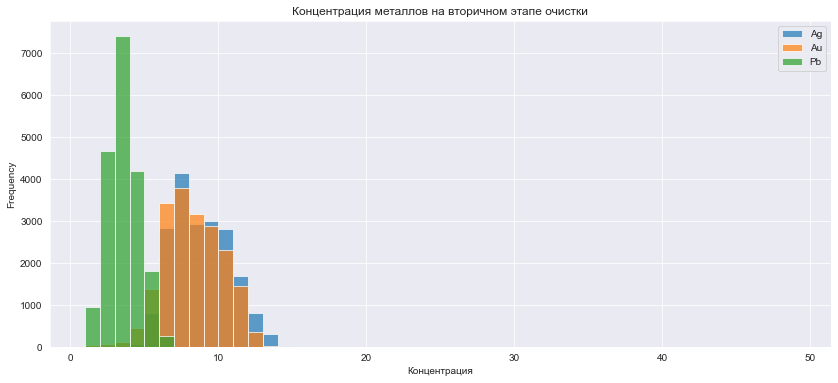

In [ ]:
plt.figure(figsize=(14,6))
data_full['rougher.input.feed_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.input.feed_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.input.feed_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на вторичном этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

##### Черновой этап

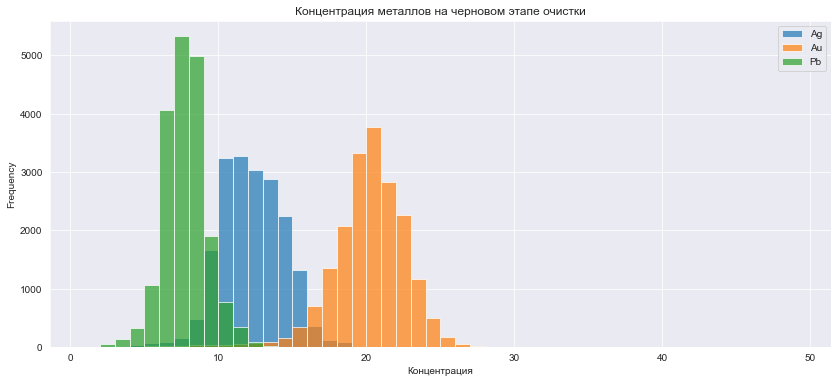

In [ ]:
plt.figure(figsize=(14,6))
data_full['rougher.output.concentrate_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.output.concentrate_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.output.concentrate_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на черновом этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

###### Первичный этап очистки

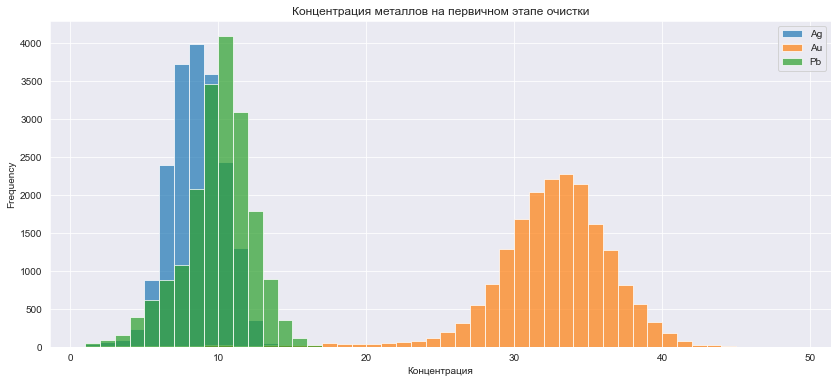

In [ ]:
plt.figure(figsize=(14,6))
data_full['primary_cleaner.output.concentrate_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['primary_cleaner.output.concentrate_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['primary_cleaner.output.concentrate_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на первичном этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

##### Вторичный этам очитски

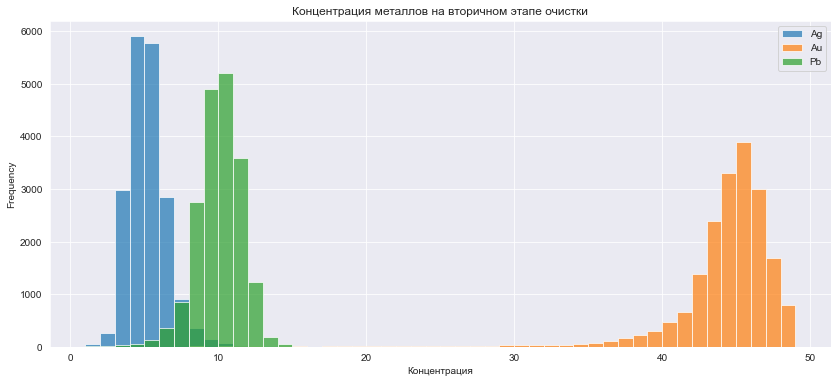

In [ ]:
plt.figure(figsize=(14,6))
data_full['final.output.concentrate_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['final.output.concentrate_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['final.output.concentrate_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на вторичном этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

##### По результату анализа мы видим, что с этапами обработки увеличивается концентрация золота, а концентрации серебра и синца снижаются

<a id="step_2.1"></a>
## Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

In [ ]:
def compare_train_test_features(features):
    plt.figure(figsize=(14,6))
    (data_train[features]).plot.kde(linewidth=3,alpha=0.7)
    (data_test[features]).plot.kde(linewidth=3, alpha=0.7)
    plt.legend(['Тренировочная выборка','Тестовая выборка'])
    plt.title('Распределение размеров гранул на обучающей и тестовой выборках')
    plt.xlabel('Размер гранул')
    plt.grid(True)
    plt.show()

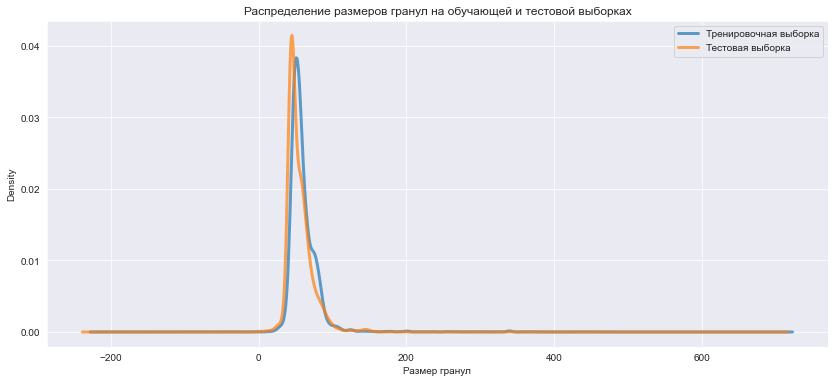

In [ ]:
compare_train_test_features('rougher.input.feed_size')

##### Отлично, распределение гранул по двум выборкам совпадают, а значит и оценка модели должна быть правильной.

<a id="step_2.2"></a>
## Исследуем суммарную концентрацию всех веществ на разных стадиях:

#### Напишем функцию для подсчёта:

In [ ]:
def sum_concentration_col(data,concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    ag=data[concentrat_ag]
    au=data[concentrat_au]
    pb=data[concentrat_pb]
    sol=data[concentrat_sol]
    sum_conc=ag+au+pb+sol
    
    plt.figure(figsize=(14,6))
    sum_conc.plot.hist(bins=100)
    plt.title('Cуммарная концентрация всех веществ')
    plt.xlabel('Значение концентрации')
    plt.ylabel('Количество значений')
    plt.grid(True)
    plt.show()
    print('Распределение данных:\n ',sum_conc.describe())

<a id="step_2.2.1"></a>
### - в сырье

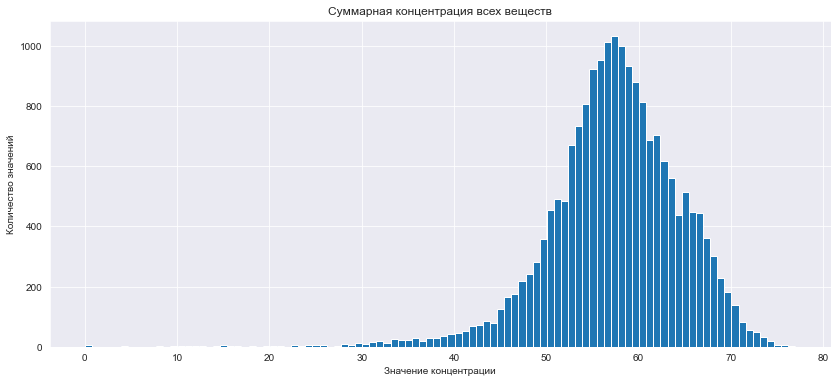

Распределение данных:
  count    19439.000000
mean        57.320789
std          7.212680
min          0.040000
25%         53.557679
50%         57.594391
75%         61.953459
max         76.978947
dtype: float64


In [ ]:
sum_concentration_col(data_full,'rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_sol')

<a id="step_2.2.2"></a>
### - в черновом

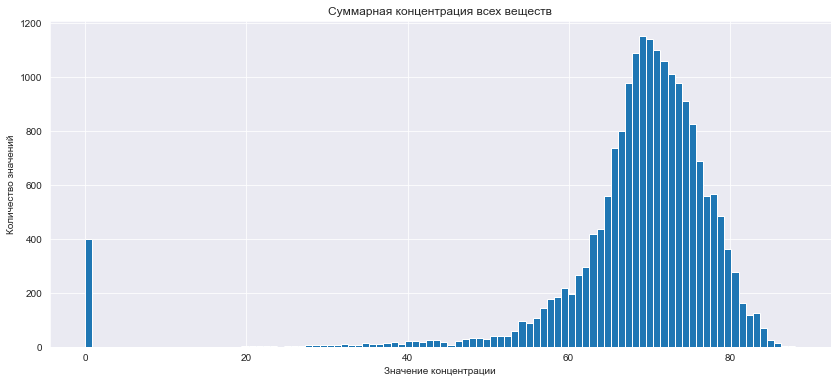

Распределение данных:
  count    19439.000000
mean        68.170865
std         12.491279
min          0.000000
25%         66.012495
50%         70.181495
75%         74.356904
max         88.140119
dtype: float64


In [ ]:
sum_concentration_col(data_full,'rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol')

<a id="step_2.2.3"></a>
### - в финальных концентратах

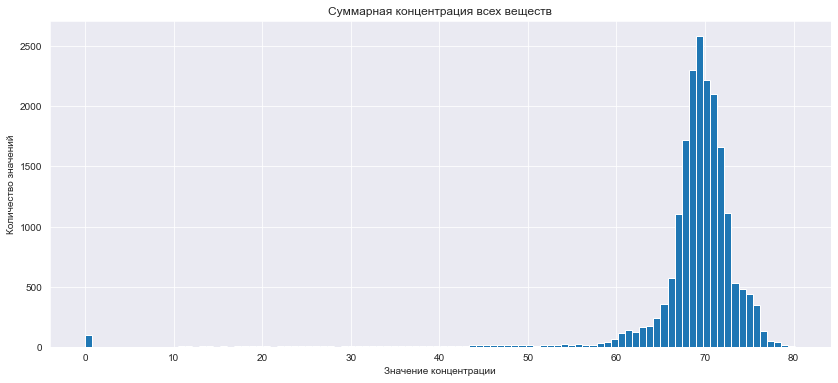

Распределение данных:
  count    19439.000000
mean        68.653624
std          7.427536
min          0.000000
25%         67.932362
50%         69.598444
75%         71.368472
max         80.210644
dtype: float64


In [ ]:
sum_concentration_col(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')

<a id="step_2.2.end"></a>
###  Опишием выводы и удалим аномалии

#### Суммарная концентрация по всем этапам обработки имеет нормальное распределение значений, но есть выбивающиеся значения у нулевой отметки, такие значения нам не интересны

#### Создадим функцию и добавим данные о сумме концентрации в общую таблицу с данными

In [ ]:
def sum_concentration_col5(data,concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    ag=data[concentrat_ag]
    au=data[concentrat_au]
    pb=data[concentrat_pb]
    sol=data[concentrat_sol]
    sum_conc=ag+au+pb+sol
    data = sum_conc
    return data

In [ ]:
data_full['sum_concentration'] = sum_concentration_col5(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')

#### Добавим значения суммы концентраций веществ в выборку `data_train`

In [ ]:
data_mud_conc=data_full[['date','sum_concentration']]
data_train = data_train.merge(data_mud_conc, on='date', how='left')

In [ ]:
data_train['sum_concentration'].describe()

count    14149.000000
mean        68.387872
std          7.023723
min          0.000000
25%         67.559819
50%         69.141502
75%         70.974661
max         80.210644
Name: sum_concentration, dtype: float64

#### Добавим значения суммы концентраций веществ в выборку `data_test`

In [ ]:
data_test = data_test.merge(data_mud_conc, on='date', how='left')

In [ ]:
data_test['sum_concentration'].describe()

count    5290.000000
mean       69.364422
std         8.372254
min         0.000000
25%        69.342800
50%        70.688587
75%        72.073175
max        79.977670
Name: sum_concentration, dtype: float64

#### Для удаления аномальных значений концентрации веществ создадим функцию

In [ ]:
def concentration_clean(data,sum_concentrat,trashold):
    data=data[data[sum_concentrat] > trashold]
    plt.figure(figsize=(14,6))
    data[sum_concentrat].plot.hist(bins=100)
    plt.title('Cуммарная концентрация всех веществ')
    plt.xlabel('Значение концентрации')
    plt.ylabel('Количество значений')
    plt.grid(True)
    plt.show()
    print('Распределение данных:\n ',data[sum_concentrat].describe())
    return data

#### Судя по распределению значений стандартного отклонения и среднего значения, мы смело можем поставить порог в *50* для обеспечения более качественного распределения значений.

#### Удалим данные из полной выборки и посмотрим распределение

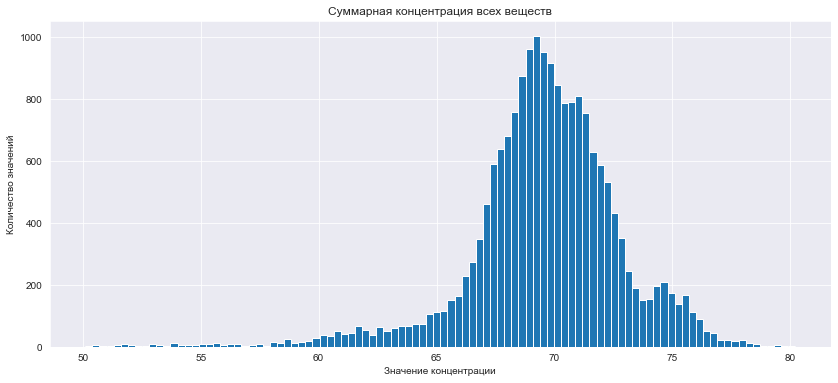

Распределение данных:
  count    19033.000000
mean        69.546324
std          3.311818
min         50.098603
25%         68.056037
50%         69.662138
75%         71.407003
max         80.210644
Name: sum_concentration, dtype: float64


In [ ]:
data_full = concentration_clean(data_full,'sum_concentration', 50)

#### Повторим удаление строк в тренировочной выборке

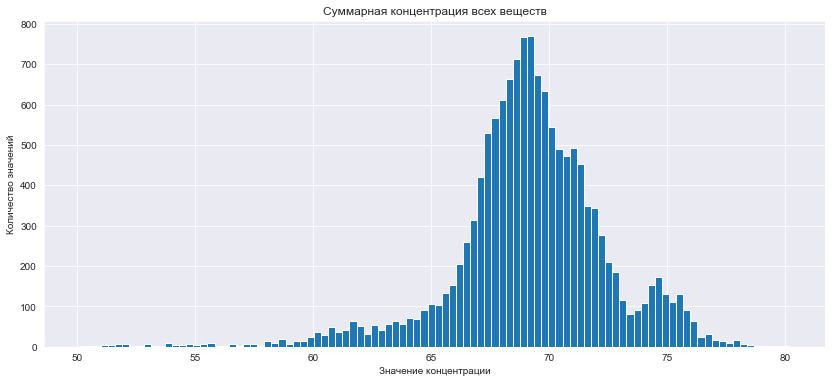

Распределение данных:
  count    13896.000000
mean        69.155362
std          3.359173
min         50.098603
25%         67.674460
50%         69.188746
75%         71.018587
max         80.210644
Name: sum_concentration, dtype: float64


In [ ]:
data_train = concentration_clean(data_train,'sum_concentration', 50)

#### Повторим удаление строк в тестовой выборке

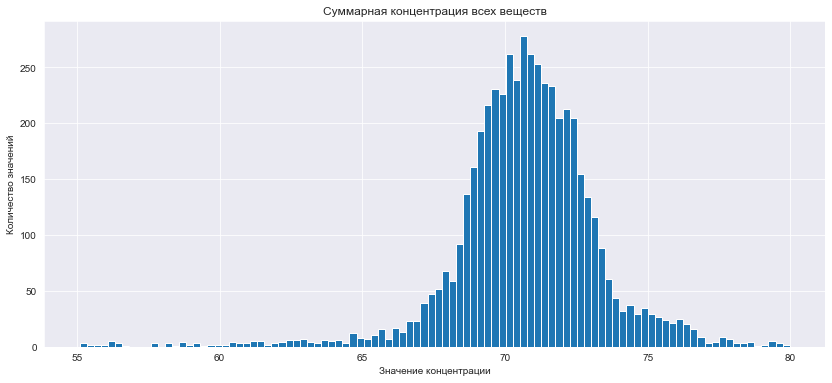

Распределение данных:
  count    5108.000000
mean       70.704453
std         2.613732
min        55.096218
25%        69.489121
50%        70.772160
75%        72.115115
max        79.977670
Name: sum_concentration, dtype: float64


In [ ]:
data_test = concentration_clean(data_test,'sum_concentration', 55)

#### Удалим столбцы из наших выборок для того, чтобы не вызвать переобучение модели

In [ ]:
data_train = data_train.drop(['sum_concentration'], axis=1)
print(data_train.shape)

(13896, 55)


In [ ]:
data_test = data_test.drop(['sum_concentration'], axis=1)

In [ ]:
print(data_test.shape)

(5108, 55)


-----

### Посмотрим на распределение данных в целевых столбцах в полной выборке данных

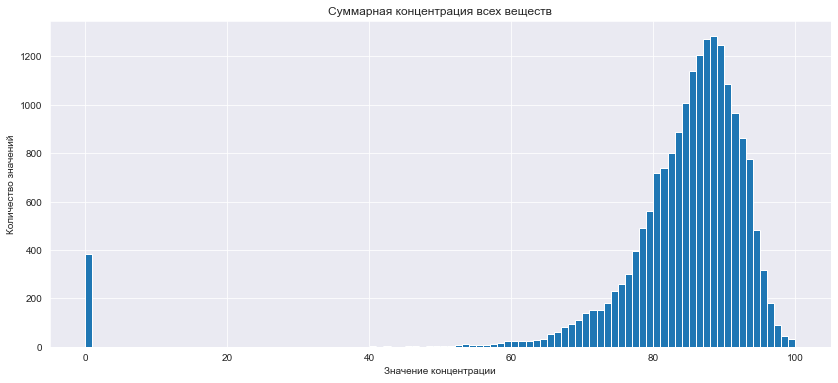

Распределение данных:
  count    19033.000000
mean        83.515919
std         13.963362
min          0.000000
25%         81.168463
50%         86.277219
75%         90.060351
max        100.000000
Name: rougher.output.recovery, dtype: float64


In [ ]:
data_full = concentration_clean(data_full,'rougher.output.recovery',-1)

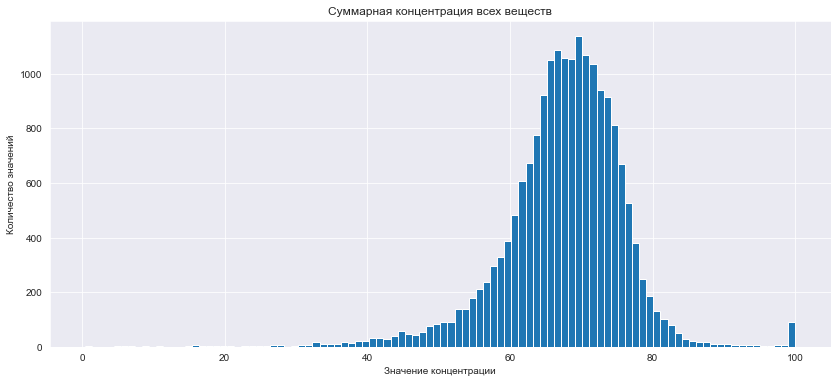

Распределение данных:
  count    19033.000000
mean        67.399266
std          8.729029
min          0.430264
25%         63.437355
50%         68.215611
75%         72.679494
max        100.000000
Name: final.output.recovery, dtype: float64


In [ ]:
data_full = concentration_clean(data_full,'final.output.recovery', -1)

### Выбераем пороговое значение концентрации в 55 для `rougher.output.recovery` 

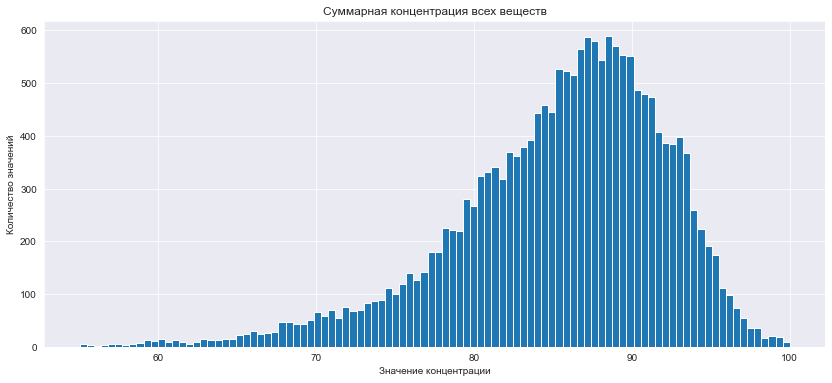

Распределение данных:
  count    18581.000000
mean        85.384050
std          6.784802
min         55.050947
25%         81.630886
50%         86.480850
75%         90.158858
max        100.000000
Name: rougher.output.recovery, dtype: float64


In [ ]:
data_full = concentration_clean(data_full,'rougher.output.recovery', 55)

### Выбераем пороговое значение концентрации в 35 для `final.output.recovery` 

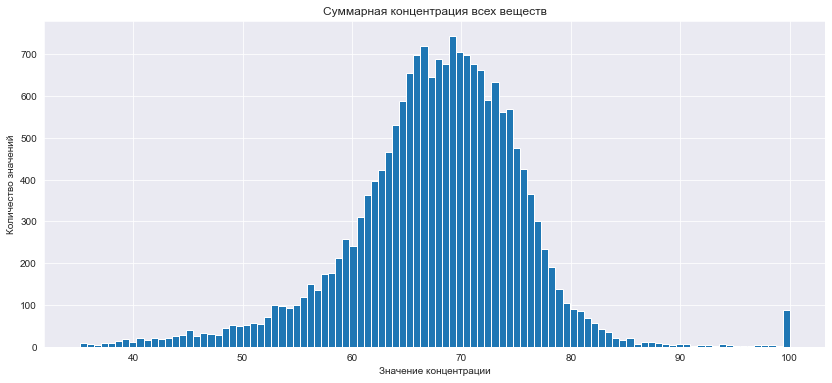

Распределение данных:
  count    18502.000000
mean        67.762431
std          7.966386
min         35.105022
25%         63.709100
50%         68.348554
75%         72.750555
max        100.000000
Name: final.output.recovery, dtype: float64


In [ ]:
data_full = concentration_clean(data_full,'final.output.recovery', 35)

### Создадим функцию для удаления аномальных и неустраивающих нас строк с даными в целевых столбцах

In [ ]:
def concentration_clean2(data,concentrat_1,concentrat_2,trashold,trashold2):
    data=data[data[concentrat_1] > trashold]
    data=data[data[concentrat_2] > trashold2]
    return data

### Выполним корректриовку значений в двух других выборках `data_train` и `data_test`

#### Удалим данные из тренировочной выборки

In [ ]:
data_train = concentration_clean2(data_train,'rougher.output.recovery','final.output.recovery',55,35)
data_train[['rougher.output.recovery','final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,13470.000000,13470.000000
mean,84.857071,67.213690
std,7.258538,8.318982
min,55.050947,35.105022
25%,80.558872,62.955420
50%,85.648396,67.547893
75%,90.368332,72.409952
max,100.000000,100.000000


#### Удалим данные из тестовой выборки

In [ ]:
data_test = concentration_clean2(data_test,'rougher.output.recovery','final.output.recovery',55,35)
data_test[['rougher.output.recovery','final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,5005.000000,5005.000000
mean,86.978368,69.248823
std,4.724165,6.678996
min,56.179625,38.519412
25%,84.953720,65.900248
50%,87.532575,70.009681
75%,89.827854,73.320629
max,99.169699,100.000000


----

<a id="step_2.end"></a>
## Вывод

Мы удалили все не вошедшие признаки из тренировочной выборки, так как по факту они абсолютно бесполезны. Если у нас концентрация всех веществ 0, то из такого сырья ничего полезного мы не получим. Такие выбросы могли появиться, из-за сбоя на прозводстве и пр. факторов.

---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_3"></a>
# 3. Модель

### Отделим целевые выборки от  тренировочных и тестовых данных и присвоим им свои переменные для дальнейшего обучения 

### `тренировочная выборка`

In [ ]:
data_train=data_train.drop('date',axis=1)

In [ ]:
dt_train_features = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
dt_train_target_r = data_train['rougher.output.recovery']
dt_train_target_f = data_train['final.output.recovery']

#### Применим масштабирование данных для более качественного обучения моделей на `тренировочной выборке`

In [ ]:
numeric = dt_train_features.columns
scaler_rougher = StandardScaler()
scaler_rougher.fit(dt_train_features[numeric]) 
dt_train_features[numeric] = scaler_rougher.transform(dt_train_features[numeric])

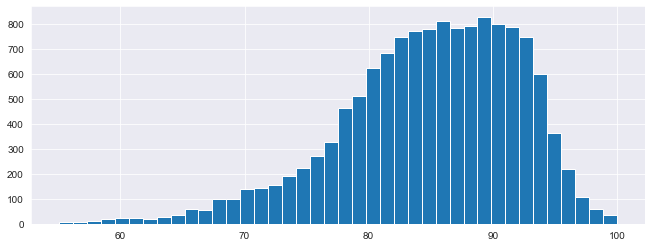

In [ ]:
plt.figure(figsize=(11,4))
dt_train_target_r.hist(bins=40)
plt.show()

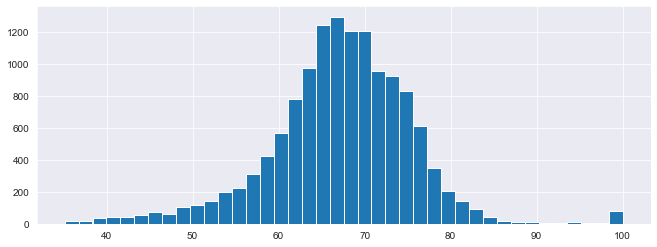

In [ ]:
plt.figure(figsize=(11,4))
dt_train_target_f.hist(bins=40)
plt.show()

### `тестовая выборка`

In [ ]:
data_test=data_test.drop('date',axis=1)

In [ ]:
dt_test_features = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
dt_test_target_r = data_test['rougher.output.recovery']
dt_test_target_f = data_test['final.output.recovery']

#### Применим масштабирование данных для более качественного обучения моделей на `тестовой выборке`

In [ ]:
numerict = dt_test_features.columns

dt_test_features[numeric] = scaler_rougher.transform(dt_test_features[numerict])

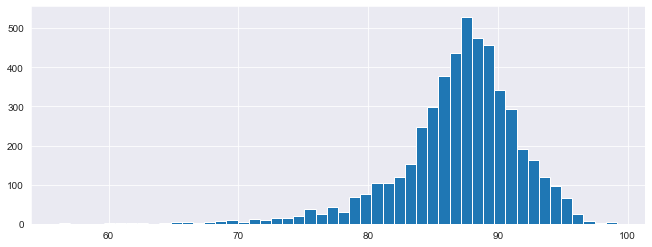

In [ ]:
plt.figure(figsize=(11,4))
dt_test_target_r.hist(bins=50)
plt.show()

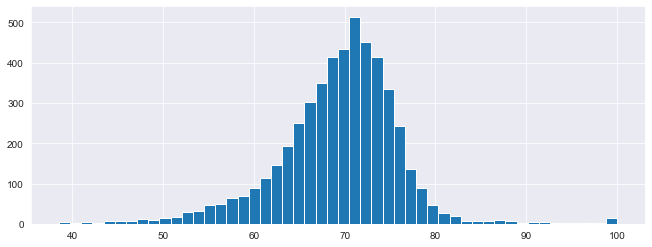

In [ ]:
plt.figure(figsize=(11,4))
dt_test_target_f.hist(bins=50)
plt.show()

### Напишем функцию для вычисления итоговой sMAPE

In [ ]:
def sMAPE(y, y_pred):
    results = abs(y - y_pred) / ((abs(y) + abs(y_pred)) / 2)
    return -1*((results.sum() / len(results)) * 100).round(2)

In [ ]:
sMAPE(target_dt,predict_dt)

-0.0

### Итоговое sMAPE

def fin_smape(target_r,target_f,rougher,final):
    fin_smape = (0.25*sMAPE(target_r,rougher))+(0.75*sMAPE(target_f,final))
    return -1*fin_smape.round(2)

In [ ]:
def fin_smape2(rougher,final):
    fin_smape = (0.25*rougher)+(0.75*final)
    return fin_smape.round(2)

<a id="step_3.1.k"></a>
## Создадим `константную` модель и проверим значение sMAPE на её данных

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

#### rougher.output.recovery

In [ ]:
model_const_r=DummyRegressor(strategy="median")
model_const_r.fit(dt_train_features,dt_train_target_r)
predict_const_model_r=cross_val_score(model_const_r,dt_train_features,dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False)).mean()
predict_const_model_r.round(2)

7.4

#### final.output.recovery

In [ ]:
model_const_f=DummyRegressor(strategy="median")
model_const_f.fit(dt_train_features,dt_train_target_f)

predict_const_model_f =cross_val_score(model_const_f,dt_train_features,dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False)).mean()
predict_const_model_f.round(2)

9.57

#### Проверим результат

#### Вычислим итоговое значение sMAPE константной модели

In [ ]:
const_model_smape = fin_smape2(predict_const_model_r,predict_const_model_f)
print('Итоговое значение sMAPE константной модели: ', const_model_smape)

Итоговое значение sMAPE константной модели:  9.03


#### Отлично, `Константная модель` создана, цель для достижения видна! Тепер проверим качество предсказания наших моделей

<a id="step_3.1"></a>
## Обучим разные модели и оценим их качество кросс-валидацией

## Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### Создадим функцию для проверки качества модели на кросс-валидации

In [ ]:
def cross_validat(model):
    score_val = (cross_val_score(model, dt_train_features, dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))).mean() 
    print('Cреднее значение sMAPE для `rougher`: ',-1*score_val.round(2))

    
    score_val_f = (cross_val_score(model, dt_train_features, dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))).mean() 
    print('Cреднее значение sMAPE для `final`: ',-1*score_val_f.round(2))

    fin_score_smape= fin_smape2(score_val,score_val_f)
    print('Итоговое sMAPE модели на кросс-валидации: ',-1*fin_score_smape.round(2)) 

### Оценим модель методом кросс-валидации при помощи нашей функции

In [ ]:
cross_validat(DecisionTreeRegressor(random_state=12345))

Cреднее значение sMAPE для `rougher`:  8.3
Cреднее значение sMAPE для `final`:  15.52
Итоговое sMAPE модели на кросс-валидации:  13.72


### Подберём параметры для модели Дерево решений при помощи цикла `for`

#### rougher.output.recovery

In [ ]:
best_model = None
best_result_r = 100
best_depth = 0
for depth in tqdm(range(1, 13)):
    model_dr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    #model.fit(dt_train_features,dt_train_target_r) 
   # predictions_valid_r = model.predict(dt_train_features) 
    result = -1*cross_val_score(model_dr,dt_train_features,dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean()
    #result = -1*sMAPE(dt_train_target_r,predictions_valid_r)
    if result < best_result_r:
        best_model = model_dr
        best_result_r = result.round(2)
        best_depth = depth

print("Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`:", best_result_r, "\nКоличество деревьев:", best_depth)


Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`: 6.65 
Количество деревьев: 4


#### final.output.recovery

In [ ]:
best_model = None
best_result_f = 100
best_depth_f = 0
for depth in tqdm(range(1, 13)):
    model_d = DecisionTreeRegressor(random_state=12345, max_depth=depth)
  
    result = -1*cross_val_score(model_d,dt_train_features,dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean()
    if result < best_result_f:
        best_model = model_d
        best_result_f = result.round(2)
        best_depth_f = depth

print("Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`:", best_result_f, "\nКоличество деревьев:", best_depth_f)


Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`: 8.7 
Количество деревьев: 1


#### Итоговое значение sMAPE модели Дерева решений

In [ ]:
fin_score_dtf = fin_smape2(best_result_r,best_result_f)
print('Итоговое значение sMAPE модели Дерева решений при подборе циклом `for`: ', fin_score_dtf )

Итоговое значение sMAPE модели Дерева решений при подборе циклом `for`:  8.19


### Подберём параметры для модели Дерева решений при помощи `GridSearchCV`

#### rougher.output.recovery

In [ ]:
parametrs_r = { 'max_depth': range (1,13) }
model_d = DecisionTreeRegressor(random_state=12345)  
grid_r = GridSearchCV(model_d, parametrs_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))
grid_r.fit(dt_train_features, dt_train_target_r)
best_score_r = -1*grid_r.best_score_
parametrs_r_gs = pd.Series(grid_r.best_params_)[0]
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'.format(best_score_r), '\nМаксимальная глубина:',parametrs_r_gs)


Для целевого признака `rougher.output.recovery` значение sMAPE равно: 6.65 
Максимальная глубина: 4


#### final.output.recovery

In [ ]:

parametrs_f = {'max_depth': range (1,13)}
model_df = DecisionTreeRegressor(random_state=12345)         
grid_r = GridSearchCV(model_df, parametrs_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))
grid_r.fit(dt_train_features, dt_train_target_f)
parametrs_f_gs=pd.Series(grid_r.best_params_)[0]
best_score_f = -1*grid_r.best_score_
print('Для целевого признака `final.output.recovery` значение sMAPE равно: {:.2f}'.format(best_score_f), '\nМаксимальная глубина:',parametrs_f_gs)


Для целевого признака `final.output.recovery` значение sMAPE равно: 8.70 
Максимальная глубина: 1


#### Итоговое значение sMAPE модели Дерева решений

In [ ]:
fin_score_dt= fin_smape2(best_score_r,best_score_f)
print('Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV: ',fin_score_dt) 

Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV:  8.18


---

## Cлучайный лес регрессии

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

### Оценим модель методом кросс-валидации при помощи нашей функции

In [ ]:
cross_validat(RandomForestRegressor(random_state=12345))

Cреднее значение sMAPE для `rougher`:  6.54
Cреднее значение sMAPE для `final`:  8.61
Итоговое sMAPE модели на кросс-валидации:  8.09


### Подберём параметры для модели Случайный лес при помощи `GridSearchCV`

#### rougher.output.recovery

In [ ]:
parametrs = { 'n_estimators': range (1, 10, 2),
              'max_depth': range (1, 13, 2)}

In [ ]:
model_rf = RandomForestRegressor(random_state=12345)
grid_rf = GridSearchCV(model_rf, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))
grid_rf.fit(dt_train_features, dt_train_target_r)

best_score_rf = -1*grid_rf.best_score_

parametrs_r_gs_d=pd.Series(grid_rf.best_params_)[0]
parametrs_r_gs_n=pd.Series(grid_rf.best_params_)[1]
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'. format(best_score_rf), '\nМаксимальная глубина:',parametrs_r_gs_d, '\nКоличество деревьев:',parametrs_r_gs_n)

Для целевого признака `rougher.output.recovery` значение sMAPE равно: 6.18 
Максимальная глубина: 5 
Количество деревьев: 9


#### final.output.recovery

In [ ]:
model_rff = RandomForestRegressor(random_state=12345)
grid_rff = GridSearchCV(model_rff, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))
grid_rff.fit(dt_train_features, dt_train_target_f)
result_gs_f= -1*grid_rff.best_score_

parametrs_f_gs_d=pd.Series(grid_rff.best_params_)[0]
parametrs_f_gs_n=pd.Series(grid_rff.best_params_)[1]
print('Для целевого признака `final.output.recovery` значение sMAPE равно: {:.2f}'.format(result_gs_f), '\nМаксимальная глубина:',parametrs_f_gs_d, '\nКоличество деревьев:',parametrs_f_gs_n)

Для целевого признака `final.output.recovery` значение sMAPE равно: 8.20 
Максимальная глубина: 5 
Количество деревьев: 9


In [ ]:
fin_score_rf= fin_smape2(best_score_rf,result_gs_f)
print('Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV: ',fin_score_rf) 

Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV:  7.69


### Подберём параметры для модели Случайный лес при помощи цикла `for`

#### rougher.output.recovery

In [ ]:
best_model = None
best_result_r = 100
best_est_r = 0
best_depth_r = 0
for est in tqdm(range(1,10, 2)):
    for depth in tqdm(range (1,13,2), desc='depth loop', leave=False):
        model_rf = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)

        result_rf = -1*cross_val_score(model_rf,dt_train_features,dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean()
     

        if result_rf < best_result_r:
            best_model = model_rf
            best_result_r = result_rf
            best_est_r = est
            best_depth_r = depth

print("Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`:", best_result_r.round(2), "\nКоличество деревьев:", best_est_r, "\nМаксимальная глубина:", best_depth_r)


Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`: 6.18 
Количество деревьев: 9 
Максимальная глубина: 5


#### final.output.recovery

In [ ]:
best_model = None
best_result_f = 100
best_est_f = 0
best_depth_f = 0
for est in tqdm(range(1,10, 2)):
    for depth in tqdm(range (1,13, 2), desc='depth loop', leave=False):
        model_rff = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
    
        result_rf = -1*cross_val_score(model_rff,dt_train_features,dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean() 
        if result_rf < best_result_f:
            best_model = model_rff
            best_result_f = result_rf
            best_est_f = est
            best_depth_f = depth

print("Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`:", best_result_f.round(2), "\nКоличество деревьев:", best_est_f, "\nМаксимальная глубина:", best_depth_f)


Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`: 8.2 
Количество деревьев: 9 
Максимальная глубина: 5


In [ ]:
fin_score_rff =fin_smape2(best_result_r,best_result_f)
print('Итоговое значение sMAPE модели Случайный лес при подборе циклом `for`: ',fin_score_rff.round(2)) 

Итоговое значение sMAPE модели Случайный лес при подборе циклом `for`:  7.69


-----

## Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

### Оценим модель методом кросс-валидации при помощи нашей функции

In [ ]:
cross_validat(LinearRegression())

Cреднее значение sMAPE для `rougher`:  6.66
Cреднее значение sMAPE для `final`:  9.88
Итоговое sMAPE модели на кросс-валидации:  9.07


### Подберём параметры для модели Линейная регрессия при помощи `GridSearchCV`

#### rougher.output.recovery

In [ ]:
parametrs = { 'fit_intercept': [True],
              'normalize': [True, False]}

In [ ]:
model_lr_r = LinearRegression()
grid_lr_r = GridSearchCV(model_lr_r, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))
grid_lr_r.fit(dt_train_features, dt_train_target_r)

fit_intercept_r=pd.Series(grid_lr_r.best_params_)[0]
normalize_r=pd.Series(grid_lr_r.best_params_)[1]

result_lr_r = -1*grid_lr_r.best_score_
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'.format(result_lr_r), '\nfit_intercept:',fit_intercept_r, '\nnormalize:',normalize_r)

Для целевого признака `rougher.output.recovery` значение sMAPE равно: 6.66 
fit_intercept: True 
normalize: True


#### final.output.recovery

In [ ]:
%%time
model_lr_f = LinearRegression()
grid_lr_f = GridSearchCV(model_lr_f, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))
grid_lr_f.fit(dt_train_features, dt_train_target_f)

fit_intercept_f = pd.Series(grid_lr_f.best_params_)[0]
normalize_f = pd.Series(grid_lr_f.best_params_)[1]
result_lr_f=-1*grid_lr_f.best_score_
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'.format(result_lr_f), '\nfit_intercept:',fit_intercept_f, '\nnormalize:',normalize_f)

Для целевого признака `rougher.output.recovery` значение sMAPE равно: 9.88 
fit_intercept: True 
normalize: True
Wall time: 234 ms


In [ ]:
fin_score_lr= fin_smape2(result_lr_r,result_lr_f)
print('Итоговое значение sMAPE модели Линейная регрессия: ',fin_score_lr) 

Итоговое значение sMAPE модели Линейная регрессия:  9.07


___

### Сведём все показатели по итоговому значению показателя `sMAPE` наших моделей на разных алгоритмах и подборах параметров в одну таблицу

In [ ]:
column=['Подбор гиперпараметров циклом "for"','Подбор гиперпараметров "GridSearchCV"','Значение sMAPE на кросс-валидации без подбора гиперпараметров']

comparison_tabl = pd.DataFrame(index=['Дерево решений','Случайный лес','Линейная регрессия','Константная модель'], columns=['Подбор гиперпараметров циклом "for"','Подбор гиперпараметров "GridSearchCV"','Значение sMAPE на кросс-валидации без подбора гиперпараметров'])
comparison_tabl['Подбор гиперпараметров циклом "for"'] = fin_score_dtf,fin_score_rff,None,const_model_smape
comparison_tabl['Подбор гиперпараметров "GridSearchCV"'] = fin_score_dt, fin_score_rf,fin_score_lr,const_model_smape
comparison_tabl['Значение sMAPE на кросс-валидации без подбора гиперпараметров'] = 13.63,8.76,9.07,9.03

comparison_tabl.style.highlight_min(color='yellowgreen',subset=column).highlight_null(null_color='lightgrey').highlight_max(color='coral',subset=column)

,"Подбор гиперпараметров циклом ""for""","Подбор гиперпараметров ""GridSearchCV""",Значение sMAPE на кросс-валидации без подбора гиперпараметров
Дерево решений,8.19,8.18,13.63
Случайный лес,7.69,7.69,8.76
Линейная регрессия,None,7.03,9.07
Константная модель,9.03,9.03,9.03


-----

<a id="step_3.2"></a>
## Выберем лучшую модель и проверим её на тестовой выборке

Т.к. модель `Случайный лес` показала наилудшие показатели значения **sMAPE** при подборе гиперпараметров и оценке её методом кросс-валидации, предсказания и проверку на тестовой выборке будем строить на ней. Так же мы рассмотрим вторую по показателям расчёта гиперпапарметров модель - `Линейная регрессия`, у неёпоказатели оценки модели на кросс-валидации не на много отстают от модели `Случайный лес`.

### Линейная регрессия

#### rougher.output.recovery

In [ ]:
model_lr_r = LinearRegression(fit_intercept=fit_intercept_r, normalize=normalize_r)
model_lr_r.fit(dt_train_features, dt_train_target_r)
pred_lr_r= model_lr_r.predict(dt_test_features)
result_lr_r = -1*sMAPE(dt_test_target_r,pred_lr_r)
result_lr_r

4.82

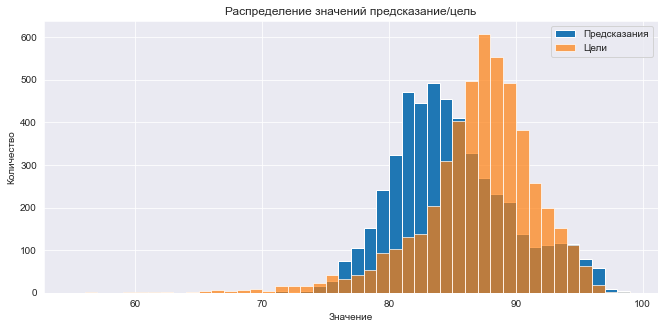

In [ ]:
plt.figure(figsize=(11,5))
pd.Series(pred_lr_r).plot(kind='hist', bins=range(55,100))
pd.Series(dt_test_target_r).plot(kind='hist', bins=range(55,100), alpha= 0.7)
plt.legend(['Предсказания','Цели'])
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

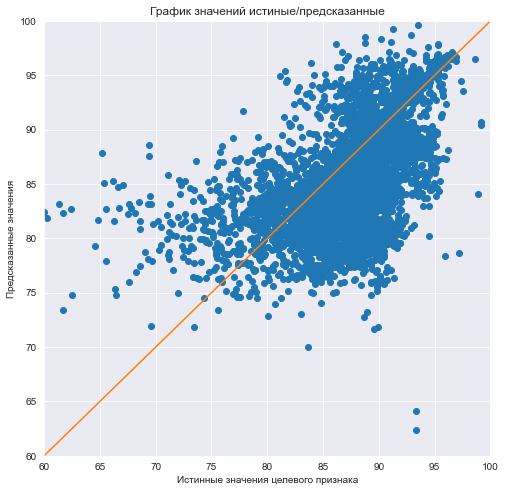

In [ ]:
plt.figure(figsize=(8,8))
t=pd.Series(dt_test_target_r)#.sort_values(ascending=True)
p=pd.Series(pred_lr_r,index=dt_test_target_r.index)
plt.plot(t,p,'o')
plt.plot([60,100],[60,100],linestyle='-')
plt.xlim(60,100)
plt.ylim(60,100)
plt.title('График значений истиные/предсказанные')
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

#### final.output.recovery

In [ ]:
model_lr_f = LinearRegression(fit_intercept=fit_intercept_f, normalize=normalize_f)
model_lr_f.fit(dt_train_features, dt_train_target_f)
pred_lr_f = model_lr_f.predict(dt_test_features)
result_lr_f = -1*sMAPE(dt_test_target_f,pred_lr_f)
result_lr_f

7.77

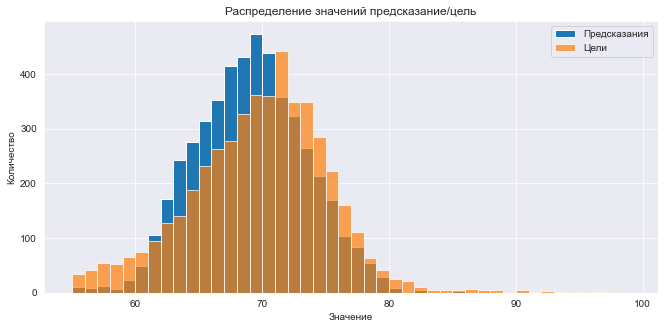

In [ ]:
plt.figure(figsize=(11,5))
pd.Series(pred_lr_f).plot(kind='hist', bins=range(55,100), alpha=1)
pd.Series(dt_test_target_f).plot(kind='hist',bins=range(55,100), alpha= 0.7)
plt.legend(['Предсказания','Цели'])
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

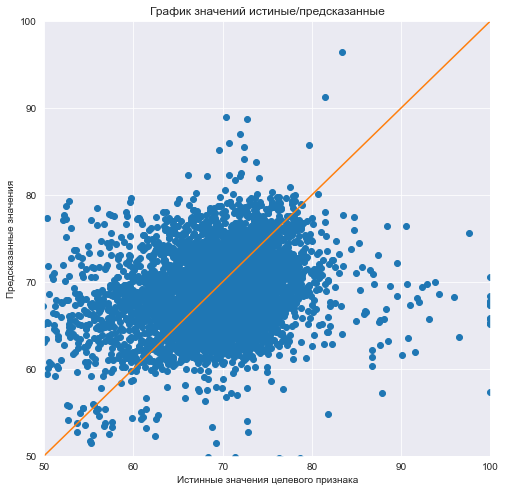

In [ ]:
plt.figure(figsize=(8,8))
t=pd.Series(dt_test_target_f) #.sort_values(ascending=True)
p=pd.Series(pred_lr_f,index=dt_test_target_f.index)
plt.plot(t,p,'o')
plt.plot([50,100],[50,100],linestyle='-')
plt.xlim(50,100)
plt.ylim(50,100)
plt.title('График значений истиные/предсказанные')
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

### Итоговое значение sMAPE модели Линейная регрессия на тестовой выборке

In [ ]:
fin_score_lr= fin_smape2(result_lr_r,result_lr_f)
print('Итоговое значение sMAPE модели Линейная регрессия: ',fin_score_lr) 

Итоговое значение sMAPE модели Линейная регрессия:  7.03


----

### Случайный лес

#### rougher.output.recovery

In [ ]:
model_rf_test_r = RandomForestRegressor(random_state=12345, n_estimators=best_est_r, max_depth=best_depth_r)
model_rf_test_r.fit(dt_train_features, dt_train_target_r) 
predictions_test_rf_r = model_rf_test_r.predict(dt_test_features)
result_rf_test_r = -1*sMAPE(dt_test_target_r,predictions_test_rf_r)
result_rf_test_r

4.06

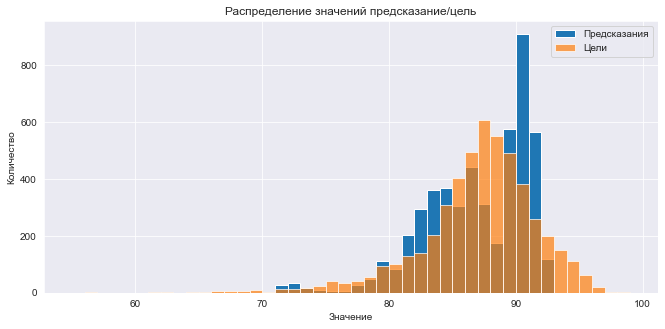

In [ ]:
plt.figure(figsize=(11,5))
pd.Series(predictions_test_rf_r).plot(kind='hist', bins=range(55,100))
pd.Series(dt_test_target_r).plot(kind='hist', bins=range(55,100), alpha= 0.7)
plt.legend(['Предсказания','Цели'])
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

#### final.output.recovery

In [ ]:
model_rf_test_f = RandomForestRegressor(random_state=12345, n_estimators=best_est_f, max_depth=best_depth_f)
model_rf_test_f.fit(dt_train_features, dt_train_target_f) 
predictions_test_rf_f = model_rf_test_f.predict(dt_test_features)
result_rf_test_f = -1*sMAPE(dt_test_target_f,predictions_test_rf_f)
result_rf_test_f

8.02

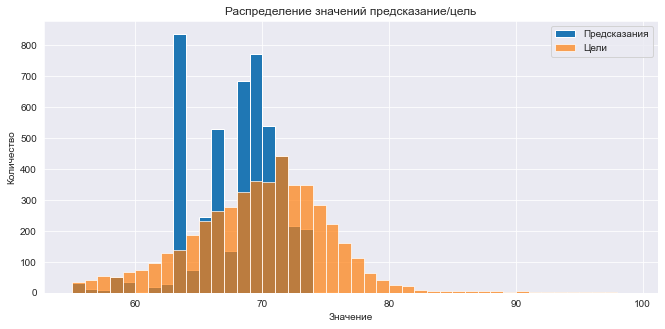

In [ ]:
plt.figure(figsize=(11,5))
pd.Series(predictions_test_rf_f).plot(kind='hist', bins=range(55,100), alpha=1)
pd.Series(dt_test_target_f).plot(kind='hist', bins=range(55,100), alpha= 0.7)
plt.legend(['Предсказания','Цели'])
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

### Итоговое значение sMAPE модели Случайный лес на тестовой выборке

In [ ]:
fin_score_test_rf = fin_smape2(result_rf_test_r, result_rf_test_f)
print('Итоговое значение sMAPE модели Случайный лес: ', fin_score_test_rf) 

Итоговое значение sMAPE модели Случайный лес:  7.03


---

### Проверим результат при помощи Константной модели

### Константная модель

In [ ]:
predict_const_model_rt = model_const_r.predict(dt_test_features)
result_lr_const_rt = -1*sMAPE(dt_test_target_r,predict_const_model_rt)
result_lr_const_rt

4.4

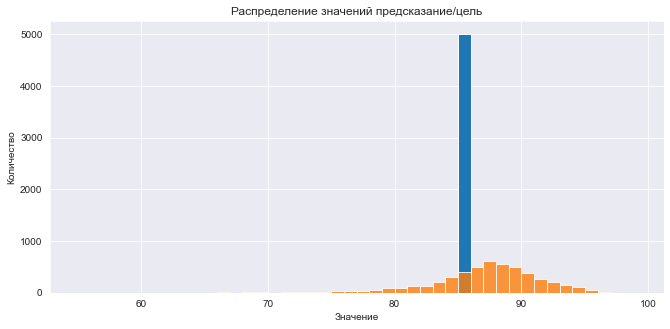

In [ ]:
plt.figure(figsize=(11,5))
pd.Series(predict_const_model_rt).hist(bins=range(55,100))
pd.Series(dt_test_target_r).hist(alpha=0.8, bins=range(55,100))
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

In [ ]:
predict_const_model_ft = model_const_f.predict(dt_test_features)
result_lr_const_ft = -1*sMAPE(dt_test_target_f,predict_const_model_ft)
result_lr_const_ft

7.73

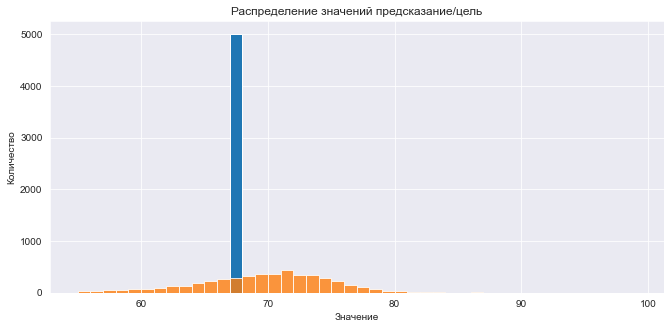

In [ ]:
plt.figure(figsize=(11,5))
pd.Series(predict_const_model_ft).hist(bins=range(55,100))
pd.Series(dt_test_target_f).hist(alpha=0.8, bins=range(55,100))
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

### Итоговое значение sMAPE константной модели на тестовой выборке

In [ ]:
const_fin=fin_smape2(result_lr_const_rt,result_lr_const_ft)
print('Итоговое значение sMAPE константной модели: ',const_fin) 

Итоговое значение sMAPE константной модели:  6.9


### Для подведения итогового сравнения значений sMAPE на тестовых данных сведём их в таблицу

In [ ]:
column=['Итоговое значение sMAPE']
comparison_tabl = pd.DataFrame(index=['Случайный лес','Линейная регрессия','Константная модель'], columns=['Итоговое значение sMAPE'])
comparison_tabl['Итоговое значение sMAPE'] = fin_score_test_rf,fin_score_lr,const_fin

comparison_tabl.style.highlight_min(color='yellowgreen',subset=column).highlight_null(null_color='lightgrey').highlight_max(color='coral',subset=column)

,Итоговое значение sMAPE
Случайный лес,7.030000
Линейная регрессия,7.030000
Константная модель,6.900000


In [ ]:
print('Отставание в результатах предсказания составляет: {:.2%} от константной модели '. format(abs(6.9/7.03-1)))

Отставание в результатах предсказания составляет: 1.85% от константной модели 


<a id="step_3.end"></a>
## Вывод

Очевидно, что по показателям качества предсказания моделей `Линейная регрессия` и `Случайнй лес` совпадают. При сравнении с константной моделью качество предсказания незначительно отстаёт на значение sMAPE в *0,04*(*1,85%*) , но по плотности распределения значений на графиках видно, что предсказания моделей более качественные, т.к. идёт большее перекрытие значений по спектру возможных значений, в отличии от константной.

---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_4.end"></a>
# 4. Вывод

   Была проведена большая работа по обработке и анализу данных по результату которых мы выяснили какие данные нам требуется определить в результате обработки данных, а какие данные не должны попадать в обучение модели. К тому же скорректировали и распределение значений во всех выборках выбрав минимальное пороговое значение.<br>
   Перед нами стояла не лёгкая задача по определению наилучшей модели, предсказания которой, должны уложиться ниже константной модели, которая в свою очередь предсказвает только одно медианное значение. Для этого мы выбирали модели при помощи `кросс-валидации` и подбирали гиперпараметры двумя способами:<br> - подбором при помощи `GridSearchCV` <br> - и циклом `for` <br>
   В результате с незначительным отрывом в *0,04 sMAPE*(*1,85%*),по отношению к двум моделям: `Линейная регрессии` и `Случайный лес`, лидировала `Константной модель`, но по плотности распределения значений на графиках видно, что предсказания наших обученных моделей более качественные, т.к. идёт большее перекрытие правильно угаданных значений.